In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from encodings.aliases import aliases

%matplotlib inline

In [2]:
#testing the encodings
alias_values = set(aliases.values())

for enc in alias_values:
    try:
        df = pd.read_csv("crime.csv", nrows = 10, encoding = enc)
        print("successful", enc)
    except:
        pass

successful mac_greek
successful iso8859_10
successful cp273
successful cp866
successful mac_iceland
successful cp037
successful cp1251
successful cp863
successful iso8859_2
successful big5hkscs
successful cp1026
successful cp861
successful cp1140
successful cp860
successful cp500
successful gb18030
successful mac_roman
successful cp865
successful kz1048
successful iso8859_14
successful iso8859_13
successful ptcp154
successful cp869
successful cp1256
successful cp1254
successful iso8859_8
successful cp862
successful cp1255
successful iso8859_11
successful latin_1
successful cp864
successful mbcs
successful cp1250
successful mac_cyrillic
successful cp855
successful iso8859_3
successful utf_16_be
successful cp1252
successful cp932
successful cp852
successful cp949
successful iso8859_5
successful mac_latin2
successful cp1257
successful cp850
successful koi8_r
successful iso8859_9
successful cp858
successful cp1253
successful iso8859_15
successful iso8859_16
successful cp775
successful cp85

In [3]:
crime = pd.read_csv("crime.csv", encoding = "ISO-8859-11")

In [4]:
crime.shape

(319073, 17)

## 

## Transforming and exploring data 

In [5]:

crime.duplicated().sum()

np.int64(23)

In [6]:
crime.drop_duplicates(inplace = True)

In [7]:
crime.shape

(319050, 17)

In [8]:
crime.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318031
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19998
Long                    19998
Location                    0
dtype: int64

In [9]:
crime.columns[(crime.isnull().sum()) != 0] #finding null columns

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [10]:
crime.columns[np.sum(crime.isnull(), axis = 0) == 0] # finding non null columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [11]:
for col in crime.columns:
     unique_values = crime[col].nunique()
     print(col, 'has', unique_values,  'unique values')

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


In [12]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [13]:
crime['OCCURRED_ON_DATE'] = pd.to_datetime(crime['OCCURRED_ON_DATE'])

In [14]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [15]:
crime[ 'OCCURRED_ON_DATE' ].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [16]:
crime[ 'OCCURRED_ON_DATE' ].dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [17]:
crime[ 'OCCURRED_ON_DATE' ].dt.isocalendar().week

0         35
1         34
2         36
3         36
4         36
          ..
319068    22
319069    28
319070    28
319071    22
319072    26
Name: week, Length: 319050, dtype: UInt32

In [18]:
crime[ 'OCCURRED_ON_DATE' ].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [19]:
crime[ 'OCCURRED_ON_DATE' ].dt.hour

0         13
1          0
2         19
3         21
4         21
          ..
319068    17
319069    13
319070    13
319071    19
319072     0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [20]:
crime.describe()

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 03:30:00,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017-01-28 04:36:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [21]:
crime.describe(include = 'object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


## 

## INSIGHTS

One

In [22]:
# Most common crimes in terms of offense group?
crime['OFFENSE_CODE_GROUP'].value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    11.638301
Larceny                             8.128820
Medical Assistance                  7.378154
Investigate Person                  5.876508
Other                               5.664629
Drug Violation                      5.185708
Simple Assault                      4.960351
Vandalism                           4.831218
Verbal Disputes                     4.105626
Towed                               3.537690
Name: count, dtype: float64

<Axes: xlabel='OFFENSE_CODE_GROUP'>

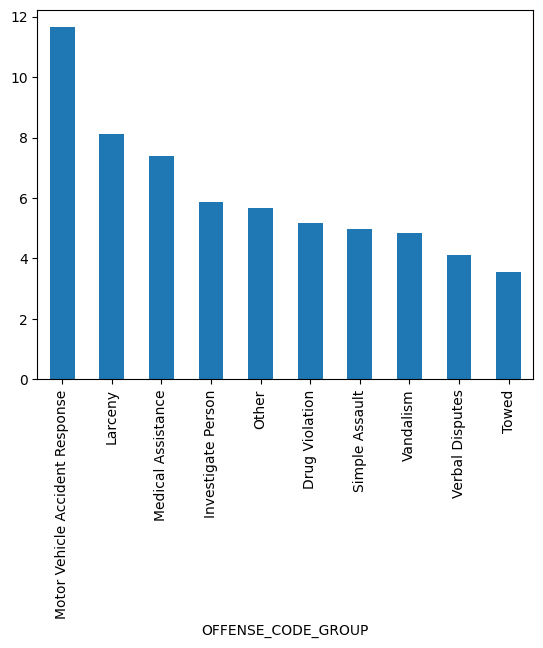

In [23]:
#represnting as graph

offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts()[:10]
total_crime = crime.shape[0]

crime_percentage = ((offense_group_vals / total_crime) * 100)
display(crime_percentage)

crime_percentage.plot(kind = 'bar')

TWO

In [24]:
## What are the least common offense groups?
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending = True)

OFFENSE_CODE_GROUP
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Biological Threat                                2
INVESTIGATE PERSON                               4
HUMAN TRAFFICKING                                7
                                             ...  
Other                                        18073
Investigate Person                           18749
Medical Assistance                           23540
Larceny                                      25935
Motor Vehicle Accident Response              37132
Name: count, Length: 67, dtype: int64

Three

In [25]:
# Question 1 - What are the most common offense descriptions?
crime.OFFENSE_DESCRIPTION.value_counts()

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
B&E RESIDENCE DAY - NO FORCE                       1
ROBBERY - UNARMED - BUSINESS                       1
B&E NON-RESIDENCE NIGHT - FORCE                    1
PROSTITUTE - COMMON NIGHTWALKER                    1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: count, Length: 244, dtype: int64

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            5.887165
INVESTIGATE PERSON                       5.877762
M/V - LEAVING SCENE - PROPERTY DAMAGE    5.116126
VANDALISM                                4.749412
ASSAULT SIMPLE - BATTERY                 4.635950
VERBAL DISPUTE                           4.105626
TOWED MOTOR VEHICLE                      3.537690
INVESTIGATE PROPERTY                     3.486601
LARCENY THEFT FROM BUILDING              2.842501
THREATS TO DO BODILY HARM                2.834039
Name: count, dtype: float64

<Axes: xlabel='OFFENSE_DESCRIPTION'>

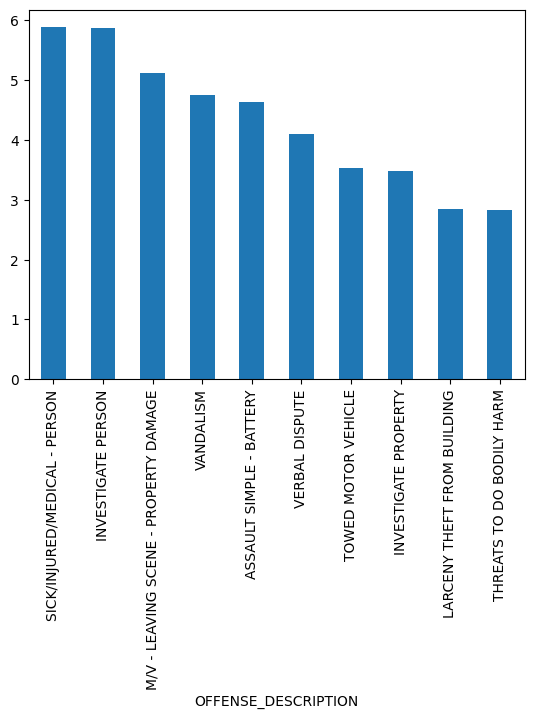

In [26]:
desc_count = crime.OFFENSE_DESCRIPTION.value_counts()[:10]
total_crime = crime.shape[0]

percentage = ((desc_count/total_crime) * 100)

display(percentage)

percentage.plot(kind = 'bar')

Four

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

<Axes: xlabel='YEAR'>

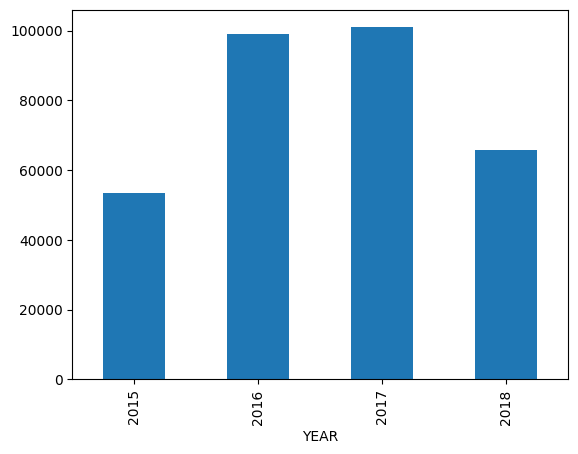

In [27]:
# In which year were the most crimes committed?
crime.groupby('YEAR').count()['INCIDENT_NUMBER']

from IPython.display import display as ipython_display
crime_year = crime.groupby('YEAR').count()['INCIDENT_NUMBER']

display(crime_year)

crime_year.plot(kind = 'bar')

FIVE

DAY_OF_WEEK
Sunday       40313
Saturday     44816
Monday       45674
Tuesday      46376
Thursday     46655
Wednesday    46727
Friday       48489
Name: INCIDENT_NUMBER, dtype: int64

<Axes: xlabel='DAY_OF_WEEK'>

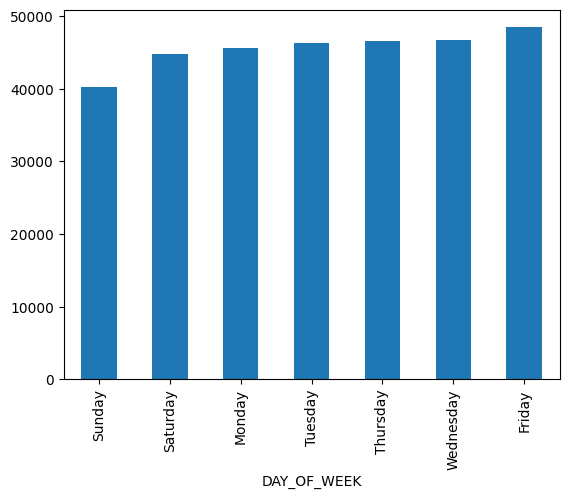

In [28]:
# Question 3 - Are there more crimes committed on specific days?
crime_count = crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending = True)

display(crime_count)

crime_count.plot(kind = 'bar' )

SIX

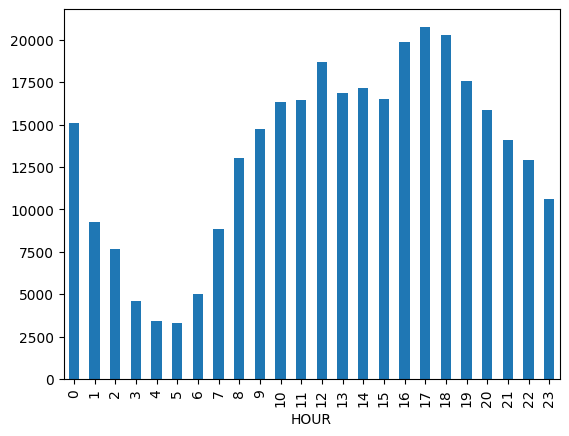

In [29]:
# Are there more crimes during specific hours?

crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar');

SEVEN

In [30]:
# On what days and during which hours are the most crimes committed?
crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
week_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

In [31]:
week_hour.columns = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]

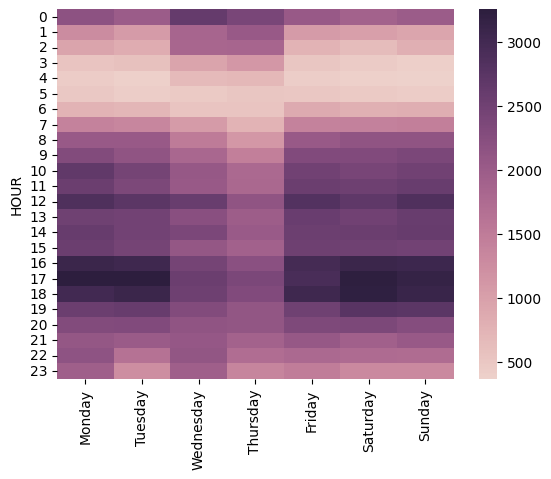

In [32]:
sns.heatmap(week_hour, cmap=sns.cubehelix_palette(as_cmap=True));

In [33]:
avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))

year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.map(style_negative, props='color:blue;')\
              .map(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2






The average number of crimes is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [34]:
# with a heatmap
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


DISTRICT,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5
YEAR,,,,,,,,,,,,
2015,6010,1027,2426,8682,5616,7363,3939,3280,7203,2800,2740,2157
2016,10922,1986,4130,15706,11145,13602,7072,6279,12953,5558,5223,4017
2017,11374,2167,4264,15680,11195,13281,7247,6509,13157,5514,5611,4309
2018,7404,1325,2724,9872,7485,8282,5199,4059,8601,3662,3773,2755


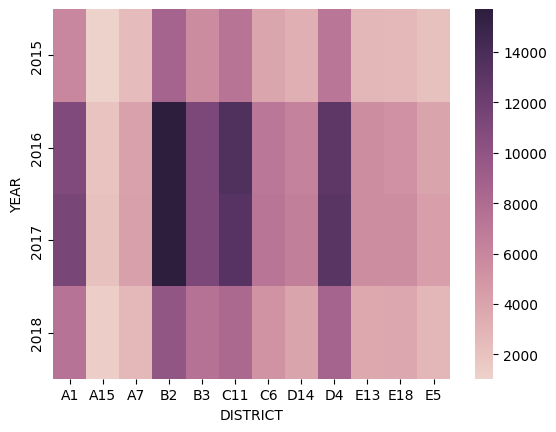

In [35]:
district_and_year = crime.groupby([ 'YEAR', 'DISTRICT']).count()['INCIDENT_NUMBER'].unstack()
display(district_and_year)

sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True));